## <center>Анализ данных пользователей</center>

### Описание данных

#### user_data:
- **client** – идентификатор пользователя
- **premium** – является ли клиент премиум
- **age** – возраст

####  logs:
- **client** – идентификатор пользователя
- **success** – результат (успех - 1, нет - 0)
- **platform** – платформа
- **time** – время в формате Unix

### Задачи

#### 1) Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. Проверьте размер таблицы, типы переменных, наличие пропущенных значений, описательную статистику.

In [1]:
# Импорт библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Считаем данные по пользователям
users_df = pd.read_csv('user_data.csv')
users_df.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [3]:
# Посмотрим на размерность данных
users_df.shape

(2954, 3)

In [4]:
# Проверим есть ли в датасете users_df пропущенные значения
miss_vals_users = users_df.isnull().sum().sort_values(ascending=False)
print(miss_vals_users[miss_vals_users > 0])

Series([], dtype: int64)


In [5]:
# Посмотрим на описательную статистику users_df
users_df.describe().T

,count,mean,std,min,25%,50%,75%,max
client,2954.0,50767.886594,28800.505847,40.0,25639.5,51569.5,75963.25,99973.0
age,2954.0,44.196005,14.248336,20.0,32.0,44.0,56.00,69.0


In [6]:
# Считаем данные по логированию
logs_df = pd.read_csv('logs.csv')
logs_df.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [7]:
# Поскольку данные о времени в формате Unix, трансформируем их в читабельный вид
logs_df['time'] = pd.to_datetime(logs_df['time'], unit='s')
logs_df.head()

,client,success,platform,time
0,40177,True,phone,2020-03-28 16:16:52
1,61468,True,phone,2020-03-28 20:00:58
2,35604,False,phone,2020-03-29 05:31:34
3,9961,True,phone,2020-03-28 12:56:29
4,10931,True,computer,2020-03-29 07:57:09


In [8]:
# Посмотрим на размерность данных
logs_df.shape

(4500, 4)

In [9]:
# Проверим есть ли в датасете logs_df пропущенные значения
miss_vals_logs = logs_df.isnull().sum().sort_values(ascending=False)
print(miss_vals_logs[miss_vals_logs > 0])

Series([], dtype: int64)


#### 2) Вопрос: Сколько уникальных значений принимает переменная platform?

In [10]:
unique = logs_df['platform'].nunique()
print(f'Переменная "platform" имеет {unique} уникальных значений')

Переменная "platform" имеет 3 уникальных значений


####  3) Какой клиент совершил больше всего успешных операций? Если несколько пользователей совершили одинаковое число успешных действий, перечислите их идентификаторы (client) через запятую и пробел в порядке возрастания.

In [11]:
# Сделаем соответствующую выборку из датасета logs_df
top_logs = logs_df \
                .query('success == True') \
                .groupby('client', as_index=False) \
                .agg({'success': 'count'}) \
                .rename(columns={'client': 'client_id', 'success': 'logs_num'}) \
                .sort_values('client_id') \
                .query('logs_num == logs_num.max()')
top_logs

,client_id,logs_num
332,12179,41
810,28719,41
1020,36165,41
1487,52870,41
1758,61468,41
1759,61473,41
2231,78349,41
2345,82563,41
2626,92584,41


In [12]:
# Получим список client_id топ пользователей
top_logs.client_id.tolist()

[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

#### 4) С какой платформы осуществляется наибольшее количество успешных операций?

In [13]:
logs_df \
        .query('success == 1') \
        .groupby('platform') \
        .agg({'platform': 'count'}) \
        .rename(columns={'platform': 'success_num'}) \
        .sort_values('success_num', ascending=False) \
        .reset_index()

,platform,success_num
0,phone,2019
1,computer,1090
2,tablet,180


#### 5) Какую платформу предпочитают премиумные клиенты?

In [14]:
# Объединим два датасета в один по колонке client
users_logs_df = users_df.merge(logs_df, on='client')
users_logs_df.head()

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,2020-03-29 03:33:59
1,4391,False,55,False,phone,2020-03-28 15:37:41
2,27372,False,64,False,phone,2020-03-29 01:40:18
3,11989,False,44,True,computer,2020-03-28 13:54:58
4,60664,False,49,True,phone,2020-03-28 14:48:38


In [15]:
# Сделаем необходимые преобразования
top_platforms = users_logs_df \
                    .query('premium == 1') \
                    .groupby('platform', as_index=False) \
                    .agg({'client': 'count'}) \
                    .rename(columns={'client': 'number'}) \
                    .sort_values('number', ascending=False)

top_platforms

,platform,number
1,phone,246
0,computer,150
2,tablet,24


#### 6) Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)

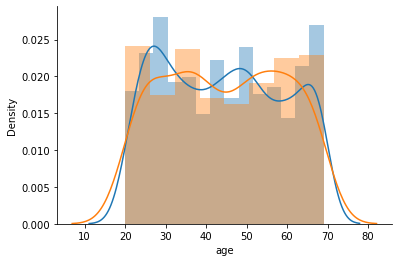

In [16]:
ax = sns.distplot(users_logs_df.query('premium == 0').age)
ax = sns.distplot(users_logs_df.query('premium == 1').age)
sns.despine()
plt.show()

#### 7) Постройте график распределения числа успешных операций: 
- **x – число успешных операций**
- **y – число клиентов, совершивших столько успешных операций**

In [17]:
successful_logs = logs_df \
                        .query('success == 1') \
                        .groupby('client', as_index=False) \
                        .agg({'success': 'count'}) \
                        .rename(columns={'client': 'client_id', 'success': 'success_num'})

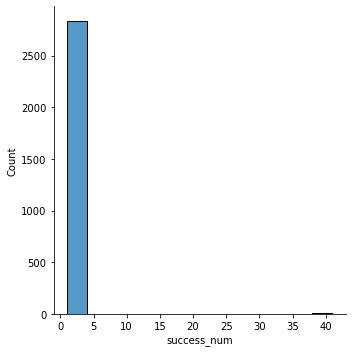

In [18]:
sns.displot(successful_logs, x='success_num')
sns.despine()

**Выводы:**
- бóльшая часть наблюдений сосредоточена в левой части графика
- несколько клиентов совершили более 40 успешных действий

#### 8) Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot. По оси x – возраст, y – число успешных операций. 
#### Вопрос: Клиенты какого возраста совершили наибольшее количество успешных действий?

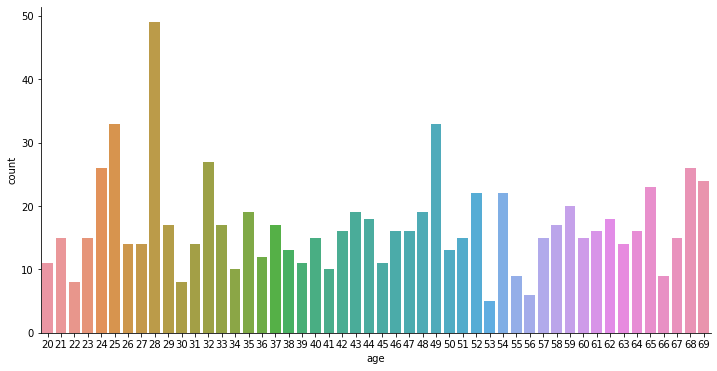

In [19]:
computer_logs_success = users_logs_df.query('platform == "computer" and success == 1')

plt.figure(figsize=(12, 6))
sns.countplot(computer_logs_success.age)
sns.despine()

Возраст клиентов с наибольшим количеством успешных действий - 28 лет.